Andrew Tomlinson 
ECE-445 Machine Learning Final Project
# In this Implementation, we will be performing SVM Classification on the Wisconsin Breast Cancer Data Set

In [4]:
import numpy as np
from matplotlib import pyplot as plt 
import pandas as pd
from pandas import read_csv
from scipy import stats # used for the statistics in fact checking the results
import seaborn as sns
from pandas import set_option
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cancer_data = read_csv('breast-cancer-wisconsin.data')
print("Dimensions of the data are ", cancer_data.shape)
cancer_data.replace('?',-99999,inplace = True)

Dimensions of the data are  (699, 11)


In [6]:
cancer_data.head()

,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nuleoli,Mitosis,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In this dataset, when the class is equal to a 2, it is classified as benign. When the sample equals to a 4, it is classified as malignant.
First we will plot this data and see the relationships

In [7]:
# First we can drop the sample code number
cancer_data.columns
target = cancer_data['Class']
#target.shape

(699,)


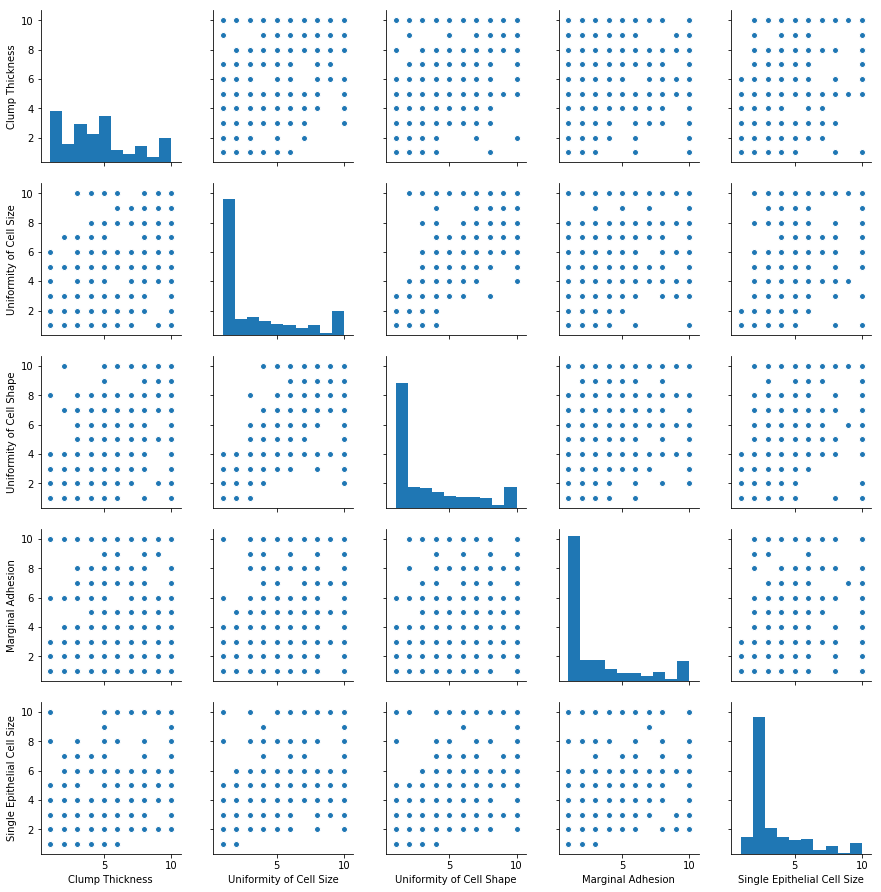

In [8]:
#target = np.array(cancer_data['Class'])
print(target.shape)
# We will first take the first 5 features (Excluding sample code Number because that is negligible)
sns.pairplot(cancer_data, vars = ['Clump Thickness','Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion','Single Epithelial Cell Size'])

In [9]:
print(cancer_data['Class'].value_counts())
print("This tells us that we have 458 benign and 241 malignant")

2    458
4    241
Name: Class, dtype: int64
This tells us that we have 458 benign and 241 malignant


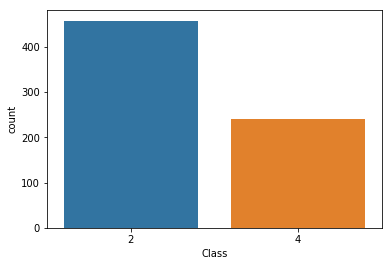

In [10]:
sns.countplot(cancer_data['Class'], label = 'count')

Now we make a heatmap to show the correlations

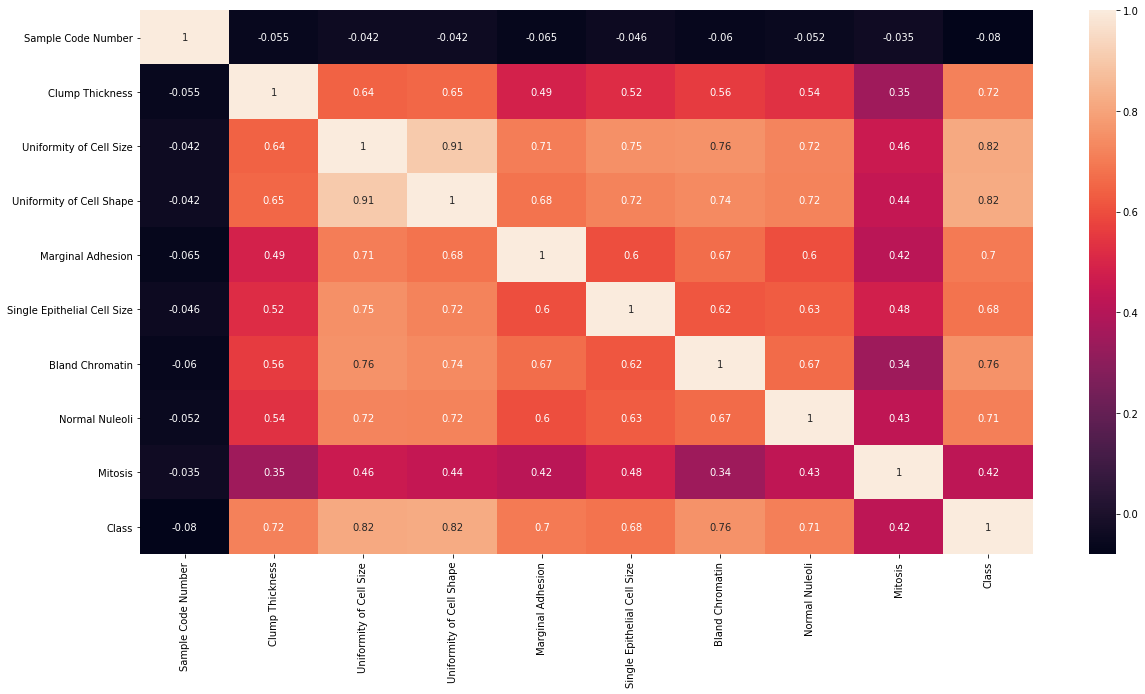

In [110]:
plt.figure(figsize = (20,10))
sns.heatmap(cancer_data.corr(), annot = True)

From the heatmap, it is seen that the uniformity of the cell's shape and size have the biggest and the same correlation when identifying the Class 

# SVM Classification
First we will need to drop the Class column from our dataset and also make a test and training set using sklearn

In [11]:
X = cancer_data.drop(['Class'], axis = 1)
X.head()

,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nuleoli,Mitosis
0,1000025,5,1,1,1,2,1,3,1,1
1,1002945,5,4,4,5,7,10,3,2,1
2,1015425,3,1,1,1,2,2,3,1,1
3,1016277,6,8,8,1,3,4,3,7,1
4,1017023,4,1,1,3,2,1,3,1,1


In [12]:
Y = cancer_data['Class']
Y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

Now we make our test and training sets. For our purposes, we will make 80% our training data and 20% our test data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 20)
print("Size of taining set X is ", X_train.shape)
print("Size of taining set Y is ", Y_train.shape)
print("Size of test set X is ", X_test.shape)
print("Size of test set Y is ", Y_test.shape)

Size of taining set X is  (559, 10)
Size of taining set Y is  (559,)
Size of test set X is  (140, 10)
Size of test set Y is  (140,)


Now we will train our data

In [14]:
cancer_SVM = SVC()
cancer_SVM.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Now that we have fit our data, the next steps are to make our prediction and check its accuracy with our test dataset.

For this we will need to make a confusion matrix

In [15]:
Y_prediction = cancer_SVM.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
confusion = np.array(confusion_matrix(Y_test, Y_prediction, labels = [2,4]))
confuse_matrix = pd.DataFrame(confusion, index = ['Cancer', 'Healthy'], columns =['Predicted has Cancer', 'Predicted Healthy'])
confuse_matrix

,Predicted has Cancer,Predicted Healthy
Cancer,90,0
Healthy,49,1


We can see from this data that our model seems to be wrong despite a good balance between training and test data. Our Cancer prediction is perfect, however, the model also says that out of 50 healthy samples, only 1 is actually predicted healthy.
Lets see what a smaller training set would do.

In [18]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X,Y, test_size = 0.4, random_state = 20)
print("Size of taining set X is ", X_train2.shape)
print("Size of taining set Y is ", Y_train2.shape)
print("Size of test set X is ", X_test2.shape)
print("Size of test set Y is ", Y_test2.shape)

Size of taining set X is  (419, 10)
Size of taining set Y is  (419,)
Size of test set X is  (280, 10)
Size of test set Y is  (280,)


In [19]:
cancer_SVM2 = SVC()
cancer_SVM2.fit(X_train2,Y_train2)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
Y_prediction2 = cancer_SVM2.predict(X_test2)

In [21]:
confusion2 = np.array(confusion_matrix(Y_test2, Y_prediction2, labels = [2,4]))
confuse_matrix2 = pd.DataFrame(confusion2, index = ['Cancer', 'Healthy'], columns =['Predicted has Cancer', 'Predicted Healthy'])
confuse_matrix2

,Predicted has Cancer,Predicted Healthy
Cancer,178,0
Healthy,100,2


We can see that even with a smaller training set at only 60% we only classify 1 more false negative

In [22]:
print("Report for 80% training\n" ,classification_report(Y_test, Y_prediction))

Report for 80% training
              precision    recall  f1-score   support

          2       0.65      1.00      0.79        90
          4       1.00      0.02      0.04        50

avg / total       0.77      0.65      0.52       140



In [23]:
print("Report for 60% training\n",classification_report(Y_test2, Y_prediction2))

Report for 60% training
              precision    recall  f1-score   support

          2       0.64      1.00      0.78       178
          4       1.00      0.02      0.04       102

avg / total       0.77      0.64      0.51       280



So we can see that in the 80% training model, 90 patients had cancer with a f-1 score of 0.78 and 50 were healthy with 0.04 f-1 score, in all we had a 0.52 f-1 score. While the 60% model had a 0.51 f-1 score. So are model was not accurate as the f-1 score tells the mean of the recall and precision which is an overall indicator of our accuracy. 

Upon looking at the report, it was seen that it actually swapped our labels. 2 is supposed to be benign while 4 is malignant, but it swapped these, so now 2 is malignant and 4 is benign.

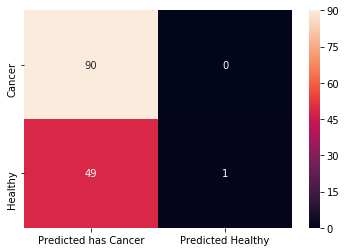

In [24]:
sns.heatmap(confuse_matrix, annot = True)

We will now try to fix the error by normalizing the data

In [25]:
X_train_min = X_train.min()
X_train_max = X_train.max()
X_train_range = (X_train_max-X_train_min)
X_train_range

Sample Code Number             13392718
Clump Thickness                       9
Uniformity of Cell Size               9
Uniformity of Cell Shape              9
Marginal Adhesion                     9
Single Epithelial Cell Size           9
Bland Chromatin                       9
Normal Nuleoli                        9
Mitosis                               9
dtype: int64

In [26]:
X_train_scaled = (X_train-X_train_min)/(X_train_range)
X_train_scaled.head()

ValueError: Cannot broadcast operands together.

In [ ]:
X_test_min = X_test.min()
X_test_max = X_test.max()
X_test_range = (X_test_max-X_train_min)
X_test_scaled = (X_test - X_test_min)/X_test_range

Now that we have the scaled test and training sets, we make new prediction using these sets

In [ ]:
Y_predict_scaled = cancer_SVM.predict(X_test_scaled)
confusion_scaled = confusion_matrix(Y_test, Y_predict_scaled)
confuse_matrix_scaled = np.array(confusion_matrix(Y_test,Y_predict_scaled, labels= [2,4]))
confusion = pd.DataFrame(confuse_matrix_scaled, index = ['cancer', 'healthy'], columns = ['predict cancer', 'predict healthy'])
confusion
                    

From this we should have seen that scaling our training and test data will yield a more accurate model. There was an error however with creating the scaled datasets and because of that could not show the more accurate model.